In [1]:
import pandas as pd
import spacy
import emoji
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/andy/Documents/DS/TFM SALLE/project/EmmaChamberlain/Emma Chamberlain_videos.csv')
df = df[df['transcript'] != 'Subtitle not available']
df['transcript'] = df['transcript'].str.replace('\xa0__\xa0', 'xxxx')

In [3]:
# Check for missing values
print(df.isnull().sum())

video_id        0
title           0
description     1
publish_date    0
likes           0
views           0
comments        0
transcript      0
dtype: int64


In [4]:
df['description'] = df['description'].fillna("")

print(df.isnull().sum())

video_id        0
title           0
description     0
publish_date    0
likes           0
views           0
comments        0
transcript      0
dtype: int64


In [5]:
# Load Eng tokenizer, POS tagger, parser, NER and word vectors
nlp = spacy.load('en_core_web_md') # medium provides a balance between accuracy and performance

def preprocess(text):
    # Lowercase the text
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize, remove stop words(letter=1), and lemmatize using SpaCy's ENG model
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha and len(token.text) > 1]

    return tokens


In [6]:
%%time

# Apply preprocessing to each column
df['title'] = df['title'].apply(preprocess)
df['description'] = df['description'].apply(preprocess)
df['transcript'] = df['transcript'].apply(preprocess)

CPU times: user 2min 27s, sys: 6.28 s, total: 2min 33s
Wall time: 2min 47s


In [7]:
# Save the DataFrame as CSV
df.to_csv('preprocessed_data.csv', index=False)

In [8]:
# Title
# Word frequency analysis
title_tokens = [token for title in df['title'] for token in title]

# Count the occurrences of each token
word_freq = Counter(title_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('day', 14), ('go', 13), ('time', 11), ('hour', 9), ('try', 9), ('not', 8), ('vlog', 8), ('trip', 8), ('coffee', 8), ('make', 7), ('fashion', 7), ('lol', 7), ('emma', 7), ('ft', 7), ('cook', 6)]
       Word  Frequency
0       day         14
1        go         13
2      time         11
3      hour          9
4       try          9
5       not          8
6      vlog          8
7      trip          8
8    coffee          8
9      make          7
10  fashion          7
11      lol          7
12     emma          7
13       ft          7
14     cook          6


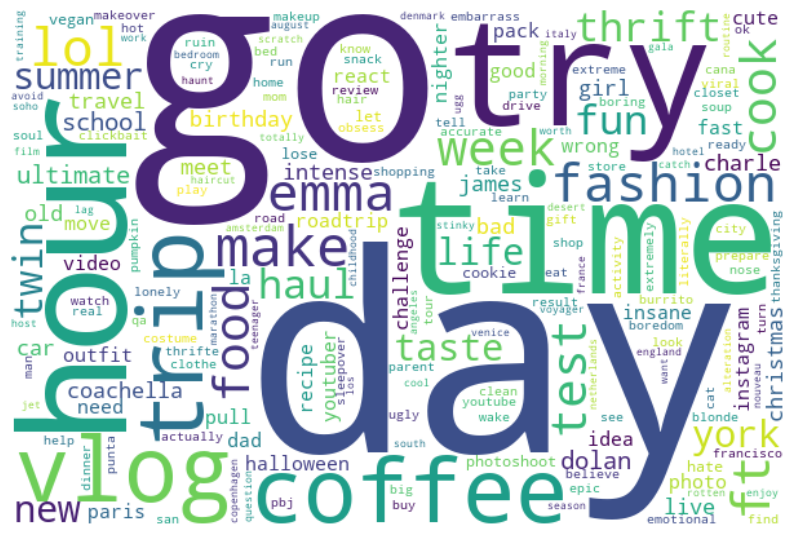

In [9]:

title_words = ' '.join([' '.join(doc) for doc in df['title']])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(title_words)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("title_wordcloud.png")

plt.show()


In [10]:
# Description
# Word frequency analysis
description_tokens = [token for description in df['description'] for token in description]

# Count the occurrences of each token
word_freq = Counter(description_tokens)

# Display the 15 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('chamberlain', 398), ('instagram', 389), ('podcast', 378), ('spotify', 359), ('emma', 349), ('emmachambie', 340), ('twitter', 299), ('social', 235), ('merch', 235), ('music', 233), ('love', 204), ('video', 198), ('snapchat', 185), ('emmachamberlain', 175), ('medium', 174)]
               Word  Frequency
0       chamberlain        398
1         instagram        389
2           podcast        378
3           spotify        359
4              emma        349
5       emmachambie        340
6           twitter        299
7            social        235
8             merch        235
9             music        233
10             love        204
11            video        198
12         snapchat        185
13  emmachamberlain        175
14           medium        174


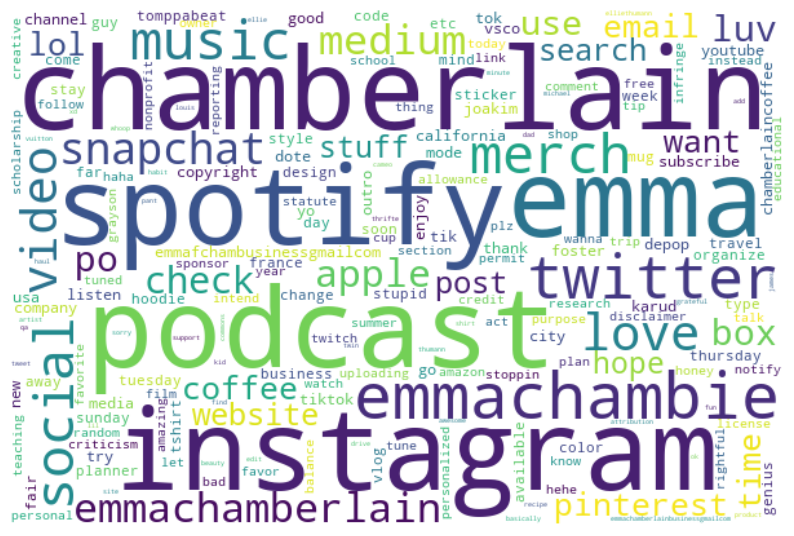

In [11]:

description_words = ' '.join([' '.join(doc) for doc in df['description']])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(description_words)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("description_wordcloud.png")

plt.show()
